In [21]:
import numpy as np
from scipy.stats import norm, bernoulli, fit
import seaborn as sns
from matplotlib.pyplot import vlines, show

In [22]:
seed = 42
np.random.seed(seed)

norm_rv = norm(2, 1)
ber_rv = bernoulli(0.75)

# MLE

## Функция правдоподобия

Если вкратце, то это просто произведение вероятностей / плотностей выборки при параметре $\theta$

$L(x_1, \ldots, x_n; \theta) = \prod \limits^{n}_{i = 1} p(x_i; \theta)$

Для непрерывных всё то же самое, только для плотности

In [23]:
n = 10

norm_rvs = norm_rv.rvs(size=n)
ber_rvs = ber_rv.rvs(size=n)
# norm_rvs

### Ручное исполнение

In [24]:
np.prod(norm(0, 1).pdf(norm_rvs)), np.prod(bernoulli(0.5).pmf(ber_rvs))  # Взял случайные параметры распределения

(9.415720403165085e-19, 0.0009765625)

Сам метод MLE заключается в подборке такого параметра $\theta$, чтобы результат был максимальным.

Записывается это так: $\hat \theta=\operatorname{argmax}\limits_{\theta\in\Theta} L(x_i, \theta)$

### Исполнение через scipy

Вообще, тут сразу ищутся нужные параметры.

FitParams(loc=2.448061125053934, scale=0.6859059113654631) FitParams(p=1.0, loc=0.0)


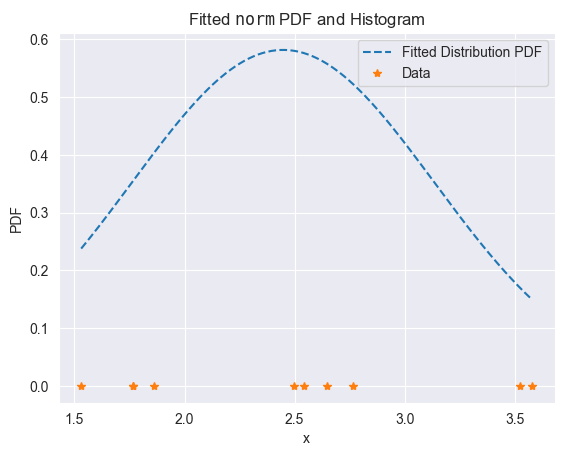

In [25]:
res_fit_norm = fit(norm, norm_rvs, [(-3, 3), (-3, 3)])  # Нужно выставлять свои пределы.
# res_fit_norm = norm.fit(norm_rvs)  # Границы параметров выставлены автоматически
res_fit_bern = fit(bernoulli, ber_rvs)
print(res_fit_norm.params, res_fit_bern.params)
res_fit_norm.plot()
# res_fit_bern.plot()
show()

# Информация Фишера

Статистическая модель от лог-функции максимального правдоподобия [$l(\theta) = \ln(L(X, \theta))$], такой, что $\Iota(\theta) = \operatorname{Var}(l'(\theta)) = -\mathbb E [l''(\theta)]$

Для примера будем работать с Бернулли

$l(p) = \ln\left(p^x \cdot (1 - p)^{1 - x}\right) = x \ln(p) + (1 - x) \ln(1 - p)$
----

$l'(p) = \dfrac x p - \dfrac{1 - x}{1 - p}$
----

$l''(p) = - \dfrac x {p^2} - \dfrac{1 - x}{(1 - p)^2}$

Вместо того чтобы работать программно, можно работать математически!

$\operatorname{Var} (\mathbb{l'}(p)) = \operatorname{Var} (\frac{x(1-p) + p(x-1)}{p(1 - p)}) = \operatorname{Var}(\frac{x - p}{p(1 - p)}) = \dfrac{p(1-p)}{(p(1-p))^2} = \dfrac{1}{p(1-p)}$
----

$-\mathbb{E[l''}(p)] = \dfrac{p}{p^2} + \dfrac{1-p}{(1-p)^2} = \dfrac{1}{p(1-p)}$

In [31]:
np.log(np.prod(ber_rv.pmf(ber_rvs))), ber_rv.var()

(-2.8768207245178092, 0.1875)

In [28]:
ber_rv.var(), ber_rv.mean() * (1 - ber_rv.mean())

(0.1875, 0.1875)